# Importing Necessary Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats

from sklearn.feature_selection import mutual_info_classif

# Importing the Data

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Initial Understanding of the Data (Checks for Datatypes and Missing Values)

Now that the data has been loaded. Let's 

In [3]:
def initial_info(data):
    print("")
    print("---------------------------------------------------")
    print("")
    print("First five rows of Dataframe:")
    display(data.head())
    print("---------------------------------------------------")
    print("")
    print("Statistical information of Dataframe:")
    display(data.describe())
    print("---------------------------------------------------")
    print("")
    print("Identifying Datatypes and checking for null values:")
    print("")
    display(data.info())   

In [4]:
initial_info(df)


---------------------------------------------------

First five rows of Dataframe:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


---------------------------------------------------

Statistical information of Dataframe:


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


---------------------------------------------------

Identifying Datatypes and checking for null values:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-nul

None

## Checking for Duplicates

We can see above that there are no nulls in the dataset. Let us check if there are any duplicate customer entries by checking the customerID column.

In [5]:
df['customerID'].nunique()

7043

There are 7043 unique values. Therefore we can be confident that there are no duplicates.

## Making sure all columns are the correct Datatype

Why is the **SeniorCitizen** column in *int64* format?

In [6]:
df['SeniorCitizen']

0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, Length: 7043, dtype: int64

In [7]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

Seems like this column has been binarized into two categories: 1 or 0, with 1 indicating that the customer is a senior citizen. We can convert the datatype of this column into ***category***.

In [8]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')

Let's check if the column datatype has been converted.

In [9]:
df['SeniorCitizen']

0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, Length: 7043, dtype: category
Categories (2, int64): [0, 1]

We can see above that the dtype is now *category*.

Moving on, we can see that the **MonthlyCharges** column has *float64* datatype but the **TotalCharges** column is of *object* type. This will need to be fixed.

In [10]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

Since the values in this column were stored as string variables, there is a possibility that there are missing values not being recognized as nulls. These empty values could be stored as empty strings.

In [11]:
empty_total_charge_count = df.loc[df['TotalCharges']==' ', 'TotalCharges'].count()
print(f'Number of Records with missing Total Charges: {empty_total_charge_count}')

Number of Records with missing Total Charges: 11


It's good that we checked as we now found that 11 different records seem to have missing values. Is there a reason for why these records have missing values in the **TotalCharges** column?

The answer may lie in the **tenure** column. Let us observe the number of months that these customers have been customers.

In [12]:
df.loc[df['TotalCharges']==' ',['tenure','TotalCharges']]

,tenure,TotalCharges
488,0,
753,0,
936,0,
1082,0,
1340,0,
3331,0,
3826,0,
4380,0,
5218,0,
6670,0,


All of them have their **tenure** value as 0. Perhaps they have not completed their first month yet? Maybe they are on their free trial and therefore have not been billed yet?

Let us look at the total number of records in the dataset that have their **tenure** value = 0.

In [13]:
zero_tenure_count = len(df[df['tenure']==0])
print(f'The number of records with Tenure value as 0 is : {zero_tenure_count}')

The number of records with Tenure value as 0 is : 11


As we can see from above, there are 11 records in the entire dataframe with the **tenure** value equalling 0. This means that only the customers with missing **TotalCharges** have 0 months of subscription. Therefore, we can conclude in confidence that the missing values in the **TotalCharges** column is not because of a mistake. It is because they are likely in their trial period and have not been billed yet.

To deal with these missing values, we will us their monthly charge of these customers as their total charge.

In [14]:
df.loc[df['TotalCharges']==' ',['MonthlyCharges','TotalCharges']]

,MonthlyCharges,TotalCharges
488,52.55,
753,20.25,
936,80.85,
1082,25.75,
1340,56.05,
3331,19.85,
3826,25.35,
4380,20.00,
5218,19.70,
6670,73.35,


In [15]:
# Replacing missing values with monthly charge values
df.loc[df['TotalCharges']==' ','TotalCharges'] = df.loc[df['TotalCharges']==' ','MonthlyCharges']

#Converting the TotalCharges column to float64 dtype

df['TotalCharges'] = df['TotalCharges'].astype('float64')

Let us now check how many records have the same number of monthly and total charges.

In [16]:
len(df.loc[df['TotalCharges']== df['MonthlyCharges'],'tenure'])

624

The 11 records are all customers who previously had missing **TotalCharges**. This confirms that we have solved our missing values problem in this column.

## Feature Engineering

Let us look at the columns in our dataset once again:

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   object  
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   object  
 4   Dependents        7043 non-null   object  
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   object  
 7   MultipleLines     7043 non-null   object  
 8   InternetService   7043 non-null   object  
 9   OnlineSecurity    7043 non-null   object  
 10  OnlineBackup      7043 non-null   object  
 11  DeviceProtection  7043 non-null   object  
 12  TechSupport       7043 non-null   object  
 13  StreamingTV       7043 non-null   object  
 14  StreamingMovies   7043 non-null   object  
 15  Contract          7043 non-null   object  
 16  PaperlessBilling  7043 n

Let's observe what kind of groups are seen in our categorical columns. We want to drop the **customerID** column here as there would be 1 group for each user over here.

In [18]:
df_columns = list(df.select_dtypes(include = ['object','category']).drop('customerID',axis=1).columns)

category_dict = {}

for col in df_columns:
    category_dict[col] = list(set(df[col]))

In [19]:
category_dict

{'gender': ['Male', 'Female'],
 'SeniorCitizen': [0, 1],
 'Partner': ['Yes', 'No'],
 'Dependents': ['No', 'Yes'],
 'PhoneService': ['No', 'Yes'],
 'MultipleLines': ['No', 'Yes', 'No phone service'],
 'InternetService': ['DSL', 'No', 'Fiber optic'],
 'OnlineSecurity': ['No internet service', 'No', 'Yes'],
 'OnlineBackup': ['No internet service', 'Yes', 'No'],
 'DeviceProtection': ['No internet service', 'No', 'Yes'],
 'TechSupport': ['No internet service', 'No', 'Yes'],
 'StreamingTV': ['No internet service', 'No', 'Yes'],
 'StreamingMovies': ['No internet service', 'No', 'Yes'],
 'Contract': ['Two year', 'Month-to-month', 'One year'],
 'PaperlessBilling': ['Yes', 'No'],
 'PaymentMethod': ['Mailed check',
  'Electronic check',
  'Bank transfer (automatic)',
  'Credit card (automatic)'],
 'Churn': ['No', 'Yes']}

The **MultipleLines** column has 3 categories, *No phone service*, *No* and *Yes*. Users that do not have phone service also do not have multiple lines. Therefore, we can combine the two groups into one.

In [20]:
df['MultipleLines'] = df['MultipleLines'].apply(lambda x: 'No' if x == 'No phone service' else x)

We can reduce the number of categories in the **InternetService** column as well by grouping  *DSL* and *Fiber Optic* to see if a customer has internet service or not.

In [21]:
df['InternetService'] = df['InternetService'].apply(lambda x: 0 if x == 'No' else 1).astype('category')

We can see above that despite there being an **InternetService** column, the columns- **OnlineSecurity**, **OnlineBackup**, **DeviceProtection**, **TechSupport**, **StreamingTV** and **StreamingMovies** all have a *No Internet Service* category. Perhaps we could reduce the number of categories in these column by including all the customers with no internet service within the *No* category.

In [22]:
no_net_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
              'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in no_net_cols:
    df[col] = df[col].apply(lambda x: 'No' if x == 'No internet service' else x)

Now, looking at the **Contract** column, perhaps we can reduce the number of groups in a new column called **loyalty** where customers are divided into two groups- *0* for *month-to-month* customers and *1* for customers with contracts of 1 year or more.

In [23]:
df['loyalty'] =  df['Contract'].apply(lambda x: 0 if x == 'Month-to-month' else 1).astype('category')

Let's now look at the groups in our categorical columns after engineering.

In [24]:
df_columns = list(df.select_dtypes(include = ['object','category']).drop('customerID',axis=1).columns)

category_dict = {}

for col in df_columns:
    category_dict[col] = list(set(df[col]))
    
category_dict

{'gender': ['Male', 'Female'],
 'SeniorCitizen': [0, 1],
 'Partner': ['Yes', 'No'],
 'Dependents': ['No', 'Yes'],
 'PhoneService': ['No', 'Yes'],
 'MultipleLines': ['No', 'Yes'],
 'InternetService': [0, 1],
 'OnlineSecurity': ['No', 'Yes'],
 'OnlineBackup': ['Yes', 'No'],
 'DeviceProtection': ['No', 'Yes'],
 'TechSupport': ['No', 'Yes'],
 'StreamingTV': ['No', 'Yes'],
 'StreamingMovies': ['No', 'Yes'],
 'Contract': ['Two year', 'Month-to-month', 'One year'],
 'PaperlessBilling': ['Yes', 'No'],
 'PaymentMethod': ['Mailed check',
  'Electronic check',
  'Bank transfer (automatic)',
  'Credit card (automatic)'],
 'Churn': ['No', 'Yes'],
 'loyalty': [0, 1]}

With the exception of **Payment Method**, we now have only two groups in each categorical column.

Finally, let's convert the groups in our target variable **Churn** to binary numbers for later use when training our models.

In [25]:
df['Churn'] = df['Churn'].apply(lambda x: 0 if x == 'No' else 1).astype('int64')

Now we can take a look at what our dataset looks like:

In [26]:
df[:10]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,loyalty
0,7590-VHVEG,Female,0,Yes,No,1,No,No,1,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,1,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,1,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0
3,7795-CFOCW,Male,0,No,No,45,No,No,1,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,1
4,9237-HQITU,Female,0,No,No,2,Yes,No,1,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,1,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,0
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,1,No,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0,0
7,6713-OKOMC,Female,0,No,No,10,No,No,1,Yes,...,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0,0
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,1,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,0
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,1,Yes,...,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0,1


# Exploratory Data Analysis

Let us take a look at all our columns again.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   object  
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   object  
 4   Dependents        7043 non-null   object  
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   object  
 7   MultipleLines     7043 non-null   object  
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   object  
 10  OnlineBackup      7043 non-null   object  
 11  DeviceProtection  7043 non-null   object  
 12  TechSupport       7043 non-null   object  
 13  StreamingTV       7043 non-null   object  
 14  StreamingMovies   7043 non-null   object  
 15  Contract          7043 non-null   object  
 16  PaperlessBilling  7043 n

## Identifying features of Churned Customers

We can now conduct an exploration into which of the features above are causing the customer to churn.

In [28]:
#Dataframe consisting of only churned customers
churn_df = df[df['Churn']== 1]

#Dataframe consisting of customers who have not churned
non_churn_df = df[df['Churn']== 0]

### Monthly Charges

Using intuition, one may assume that the cost of the service may have a significant impact on a customer's decision on whether or not to continue their subscription. Let's look at a histogram of churned customers' **monthly** and **total** charges to see if we can find any insights to confirm this theory.

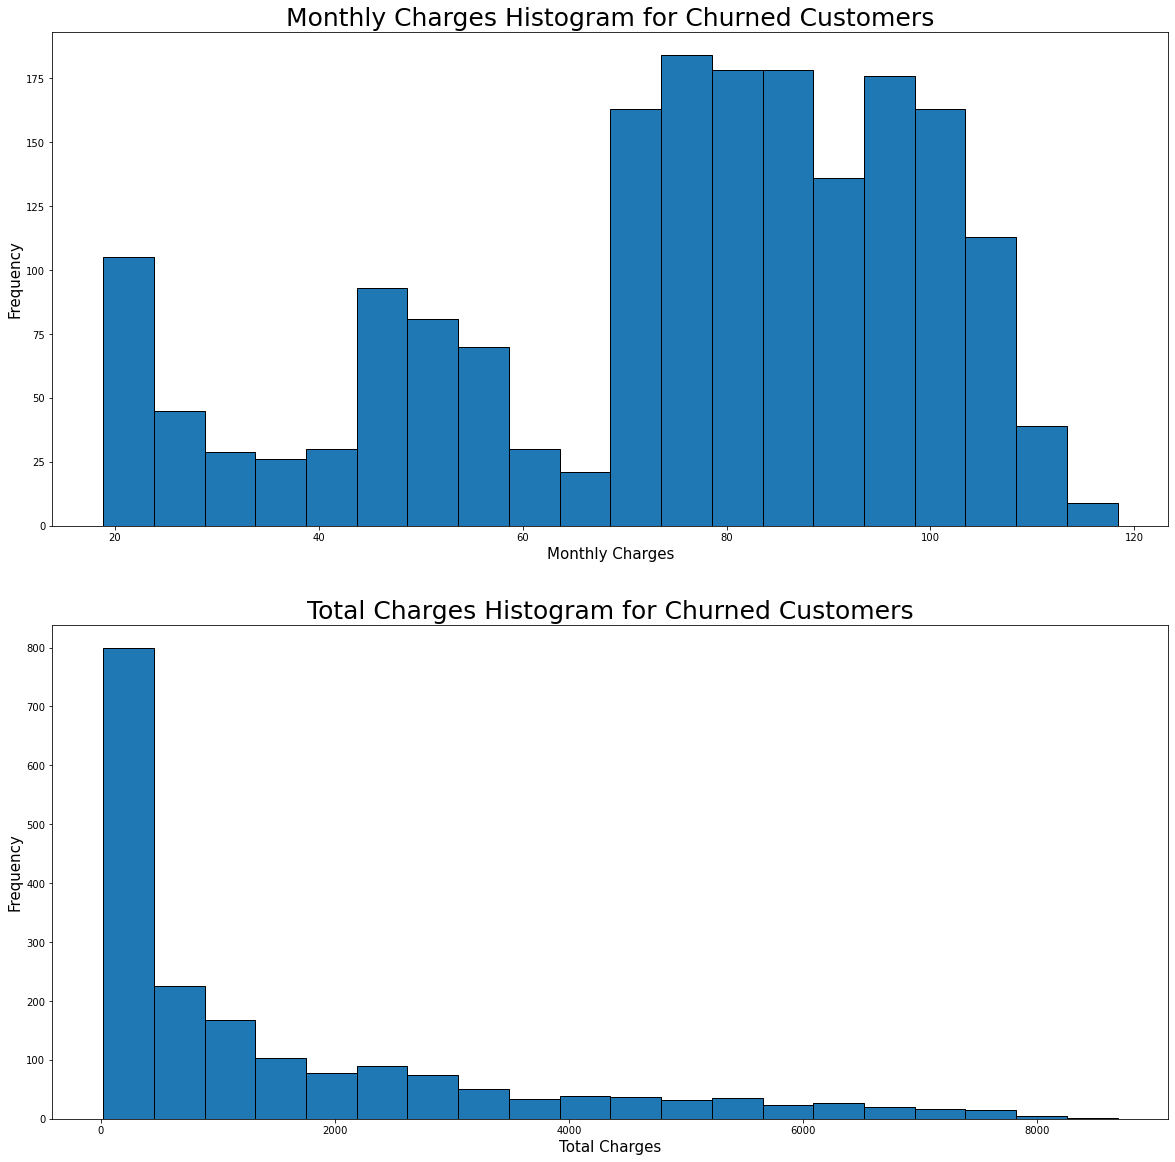

In [29]:
fig,ax = plt.subplots(2,figsize=(20,20))

ax[0].hist(churn_df['MonthlyCharges'],bins=20, edgecolor='black')
ax[1].hist(churn_df['TotalCharges'],bins=20, edgecolor='black')

ax[0].set_ylabel('Frequency', fontsize=15)
ax[0].set_xlabel('Monthly Charges',fontsize=15)
ax[0].set_title('Monthly Charges Histogram for Churned Customers', fontsize=25)
ax[1].set_ylabel('Frequency', fontsize=15)
ax[1].set_xlabel('Total Charges', fontsize=15)
ax[1].set_title('Total Charges Histogram for Churned Customers', fontsize=25);

We can see from the first histogram displaying **Monthly Charges** that customers paying higher monthly charges are churning more.

The **Total Charges** histogram is strongly skewed to the right. Seems like a lot of customers are churning within the initial period of their subscription.

To confirm the theory that **Monthly charges** are a key factor in causing customer churn, we need to identify if there is a statistically significant difference between the monthly charges of churned customers and continuing customers.

Let us conduct a hypothesis test for this.

* **Alternative Hypothesis** : "There **is** a significant difference in monthly charges between churned and continuing customers.

* **Null Hypothesis** : "There **is NOT** a significant difference in monthly charges between churned and continuing customers.

In [30]:
churn_charges = churn_df['MonthlyCharges'].tolist()
non_churn_charges = non_churn_df['MonthlyCharges'].tolist()

In [31]:
alpha = 0.05

result = stats.ttest_ind(non_churn_charges, churn_charges, 
                      equal_var=False).pvalue

if result >= alpha:
    print('Fail to reject the null hypothesis')
else:
    print('Reject the null hypothesis')    

Reject the null hypothesis


Based on the result of the above test, we can confidently conclude that there is a significant difference in **Monthly Charges** between churned and continuing customers.

Having identified that the monthly fee for customers is a significant factor of customers leaving, let us look at some of the categorical features to see which otther factors may cause customer churn.

In [32]:
def compare_churn(column):
    
    df_churn = pd.DataFrame(churn_df.groupby(column)['customerID'].count())
    df_churn.columns = ['Customers Churned Count']
    df_total = pd.DataFrame(df.groupby(column)['customerID'].count())
    df_total.columns = ['Total Customer Count']
    final_df = pd.merge(df_total,df_churn,on=column)
    final_df['% of Customers Churned'] = [f'{round((a/b)*100,2)}%' for a,b in zip(final_df['Customers Churned Count'],final_df['Total Customer Count'])]

    display(final_df)

    fig, ax = plt.subplots(figsize = (20,12))

    all_y_values = final_df['Total Customer Count'].tolist()
    churn_y_values = final_df['Customers Churned Count'].tolist()
    x_labels = list(final_df.index)
    x_ticks = list(range(len(x_labels)))

    ax.bar(x_ticks,all_y_values,label="All Customers",color='darkblue',edgecolor='black')
    ax.bar(x_ticks,churn_y_values,label="Churned Customers",color='darkorange',edgecolor='black')
    
    for a,b in zip(x_ticks,all_y_values):
        ax.text(a,b+20,f'Total Count: {b}',fontsize=15)
    
    for a,b in zip(x_ticks,churn_y_values):
        ax.text(a,100,f'Churn Count: {b}',fontsize=15,fontweight='extra bold',color='dimgray')

    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels,fontsize=15)
    ax.set_xlabel(column.title(),fontsize=20)
    ax.set_ylabel('Customer Count',fontsize=20)
    ax.set_title(f'Customer Churn comparison: {column.title()}',fontsize=30)
    ax.legend(fontsize=15,loc='upper center');

### Gender

,Total Customer Count,Customers Churned Count,% of Customers Churned
gender,,,
Female,3488,939,26.92%
Male,3555,930,26.16%


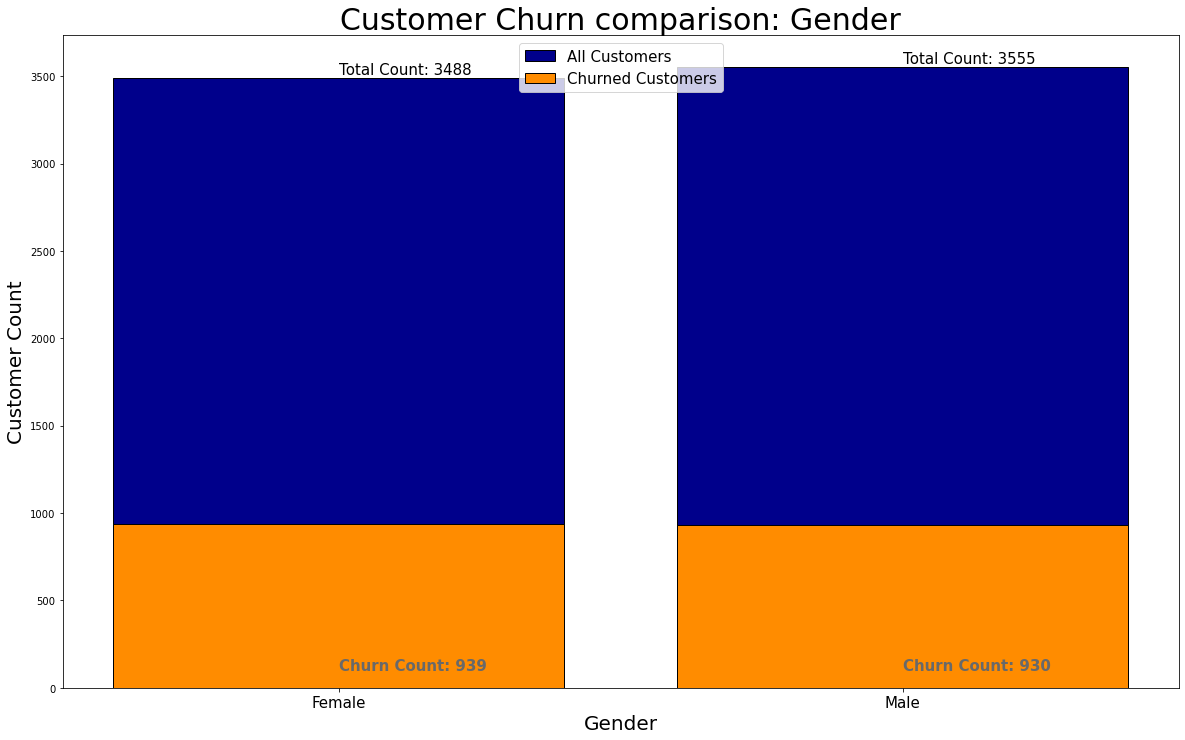

In [33]:
compare_churn('gender')

There does not seem to be any indication here that **gender** plays a role in customer churn. There are a similar number of male and female customers. And both sexes seem to have a similar proportion of their respective groups churning.

### Senior Citizen

,Total Customer Count,Customers Churned Count,% of Customers Churned
SeniorCitizen,,,
0,5901,1393,23.61%
1,1142,476,41.68%


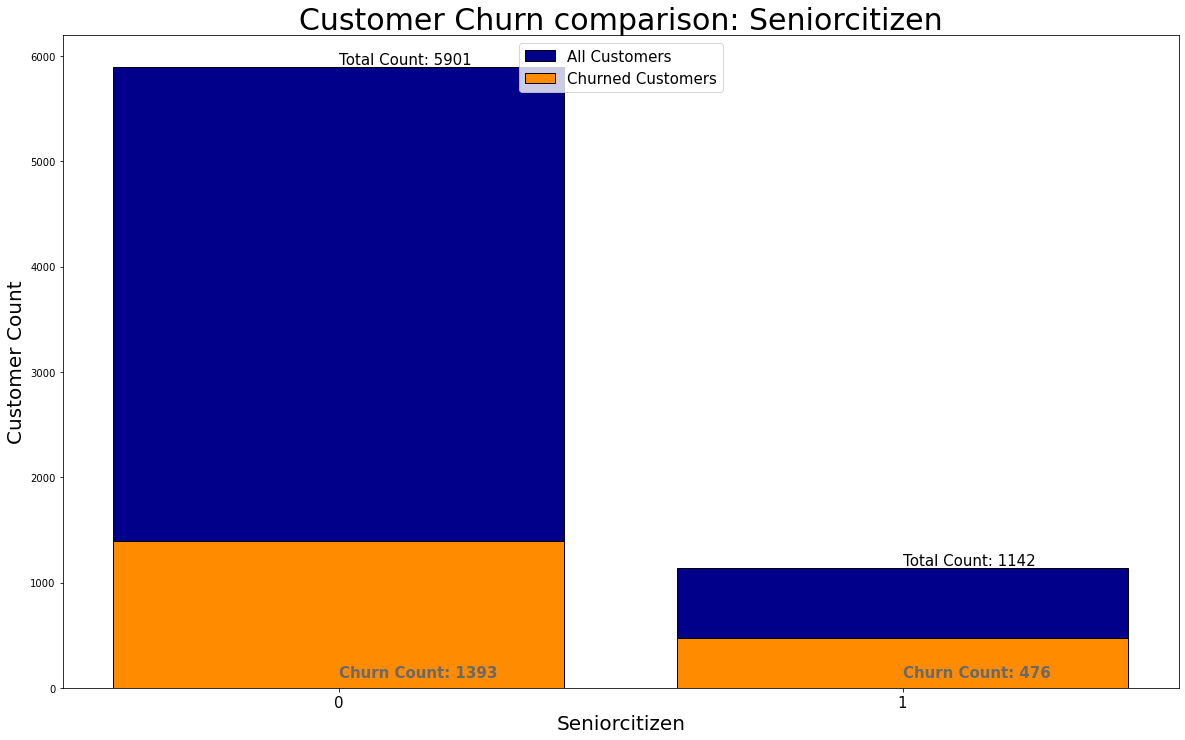

In [34]:
compare_churn('SeniorCitizen')

There are more than 5 times as many non-senior citizen customers as there are **senior citizen** customers. We can also see above that non-senior citizens have also have a higher proportion of churned customers. However, we must keep in mind that there are many more non-senior citizens than senior citizens, so it is difficult to say if the ratio of churned customers would remain the same if there were more senior citizens. Nonetheless, this information could prove useful in the future.

### Partner

,Total Customer Count,Customers Churned Count,% of Customers Churned
Partner,,,
No,3641,1200,32.96%
Yes,3402,669,19.66%


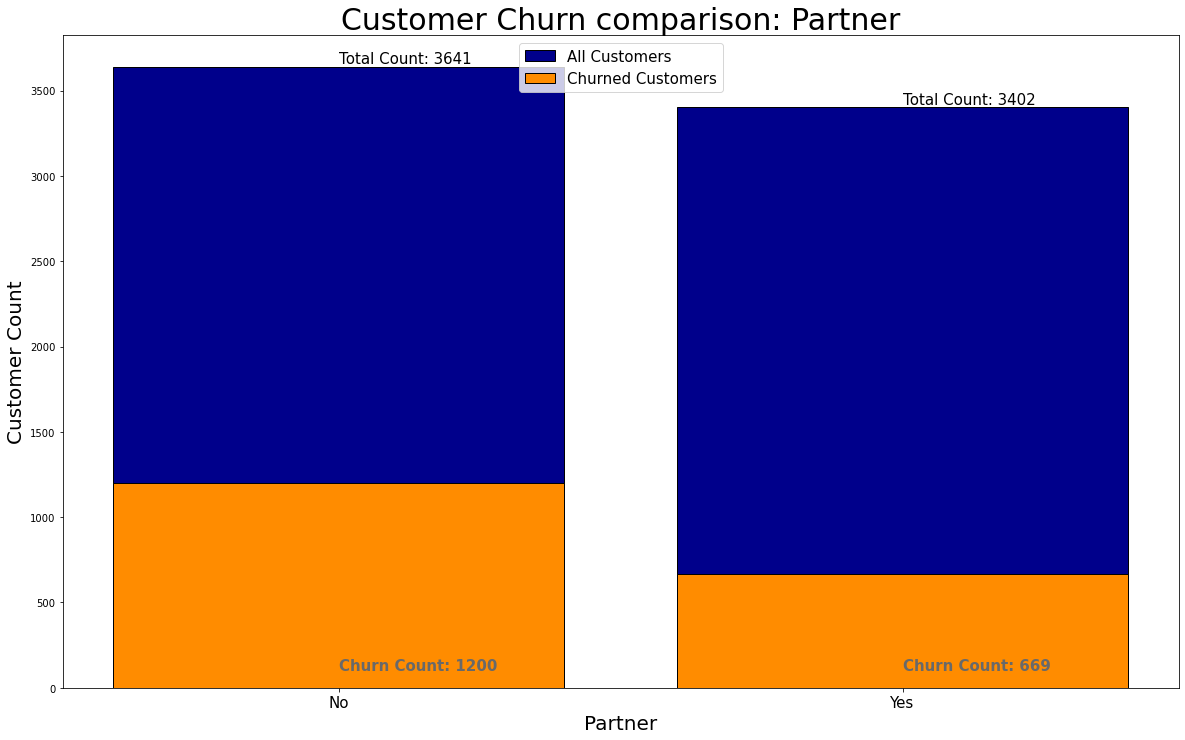

In [35]:
compare_churn('Partner')

Customers without a **Partner** seem to be churning more.

### Dependents

,Total Customer Count,Customers Churned Count,% of Customers Churned
Dependents,,,
No,4933,1543,31.28%
Yes,2110,326,15.45%


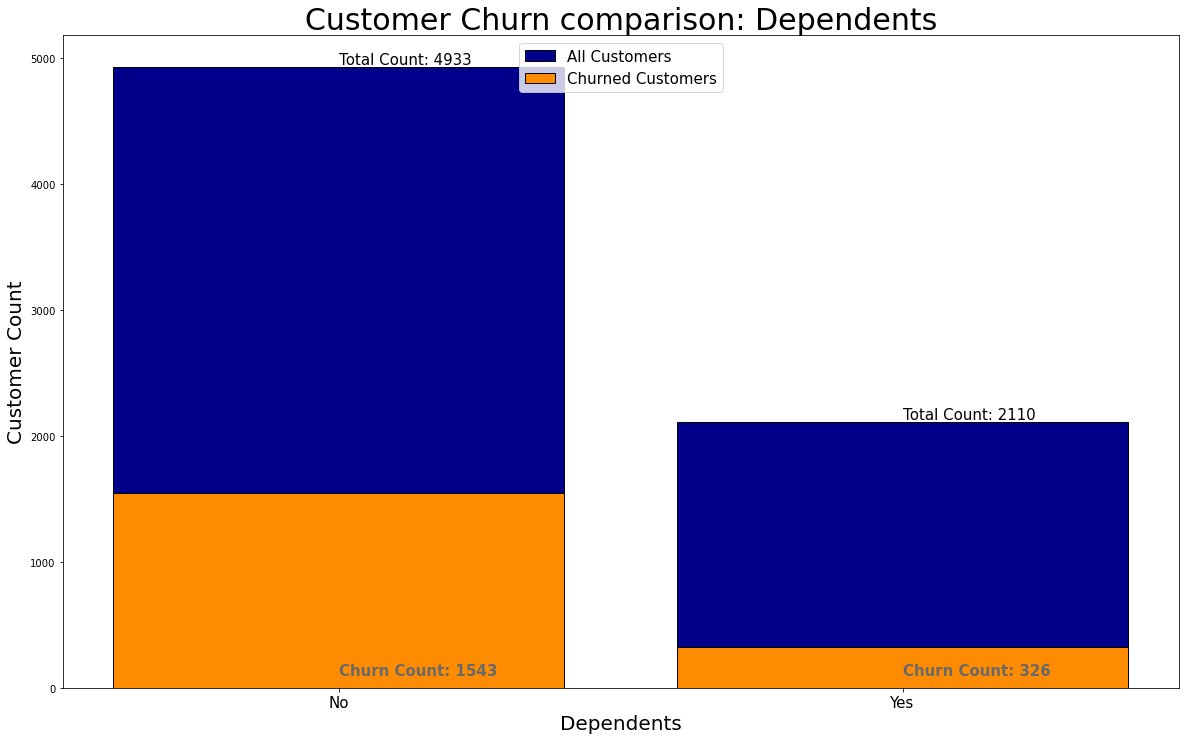

In [36]:
compare_churn('Dependents')

Unlike, the previous case where we saw a greater proportion of Senior Citizens churning, over here the number of customers with Dependents is high enogh for us to draw conclusions from it. We can see here that customers without **Dependents** are churning more as well.

### Phone Service

,Total Customer Count,Customers Churned Count,% of Customers Churned
PhoneService,,,
No,682,170,24.93%
Yes,6361,1699,26.71%


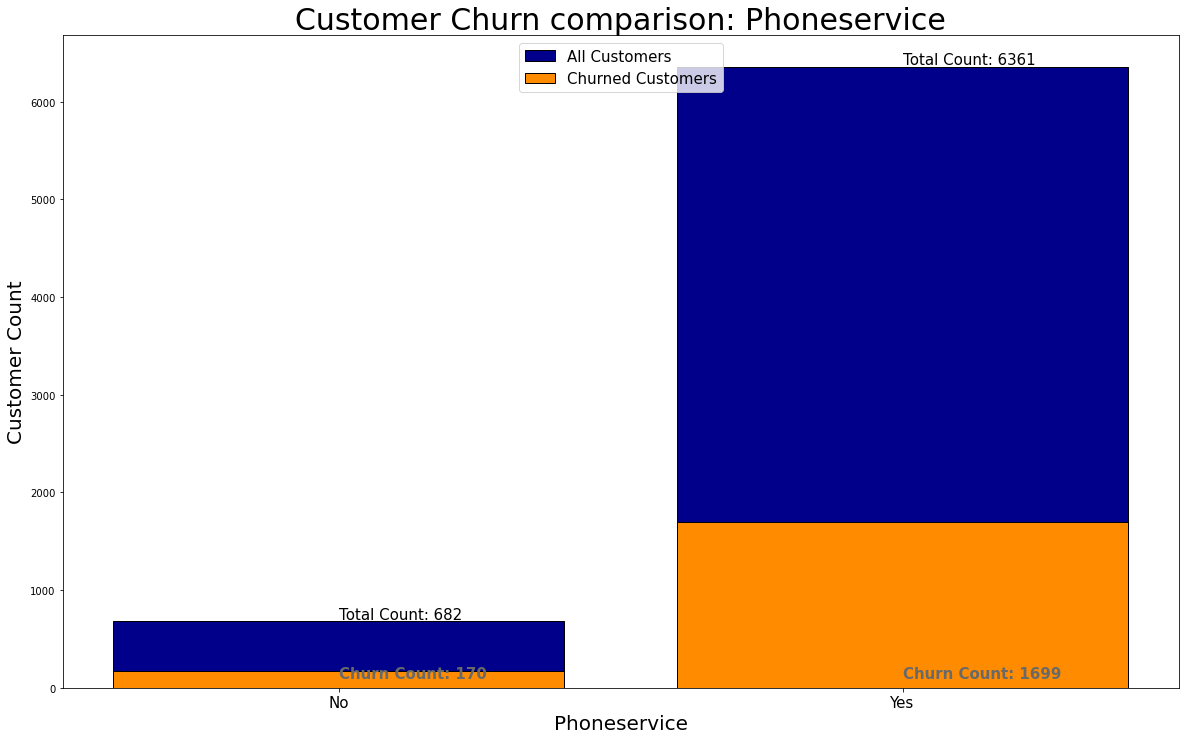

In [37]:
compare_churn('PhoneService')

There are a relatively small number of customers without **Phone Service** so it may not be so easy to compare the two groups. Nonetheless, the % of customers churned for each group is somewhat similar.

### Multiple Lines

,Total Customer Count,Customers Churned Count,% of Customers Churned
MultipleLines,,,
No,4072,1019,25.02%
Yes,2971,850,28.61%


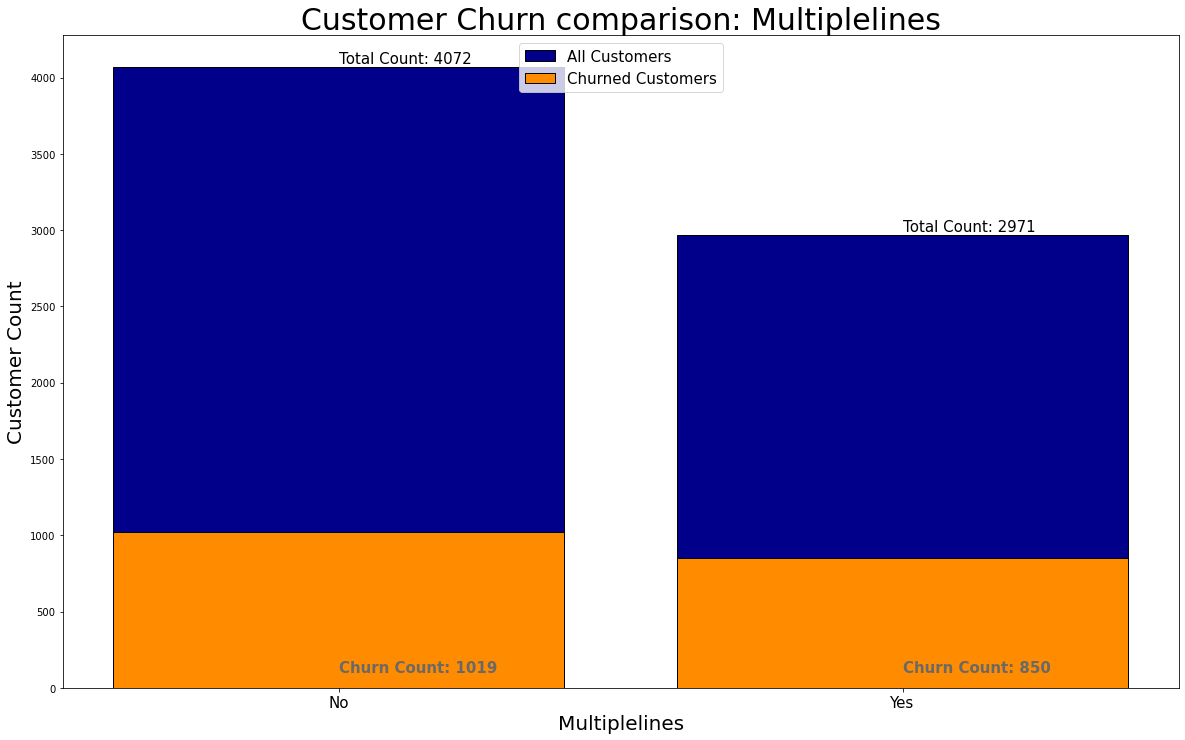

In [38]:
compare_churn('MultipleLines')

For both groups who either have or don't have **Multiple lines**, there isn't much of a difference in % of churned customers. 

### Internet Service

,Total Customer Count,Customers Churned Count,% of Customers Churned
InternetService,,,
0,1526,113,7.4%
1,5517,1756,31.83%


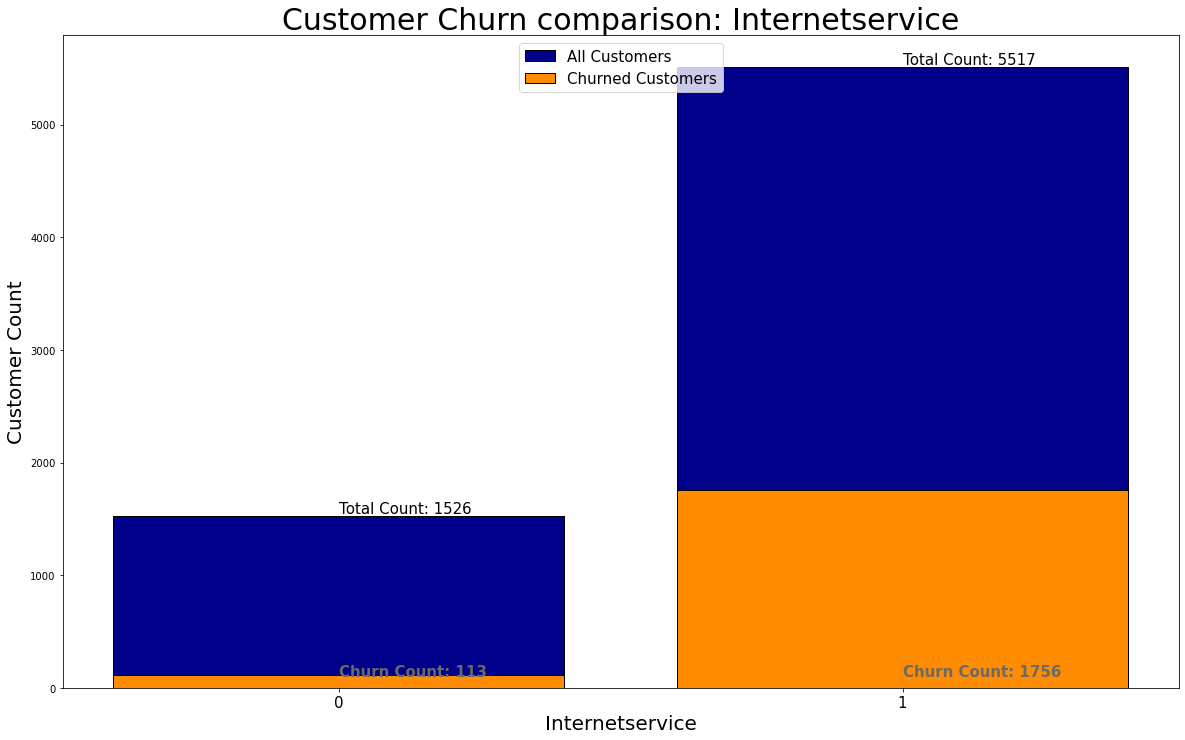

In [39]:
compare_churn('InternetService')

Customers using **Internet service** are churning more when compared with customers without it.

### Online Security

,Total Customer Count,Customers Churned Count,% of Customers Churned
OnlineSecurity,,,
No,5024,1574,31.33%
Yes,2019,295,14.61%


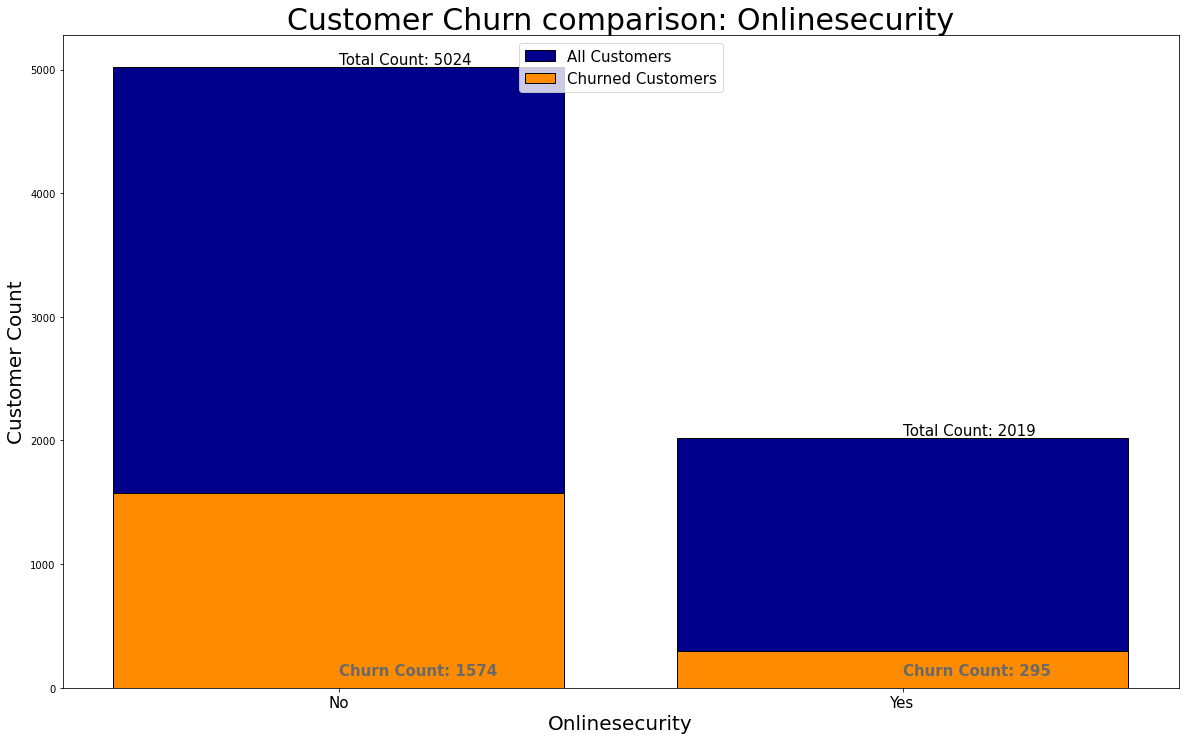

In [40]:
compare_churn('OnlineSecurity')

Customers without **Online Security** are churning more than those who are subscribed to the service.

### Online Backup

,Total Customer Count,Customers Churned Count,% of Customers Churned
OnlineBackup,,,
No,4614,1346,29.17%
Yes,2429,523,21.53%


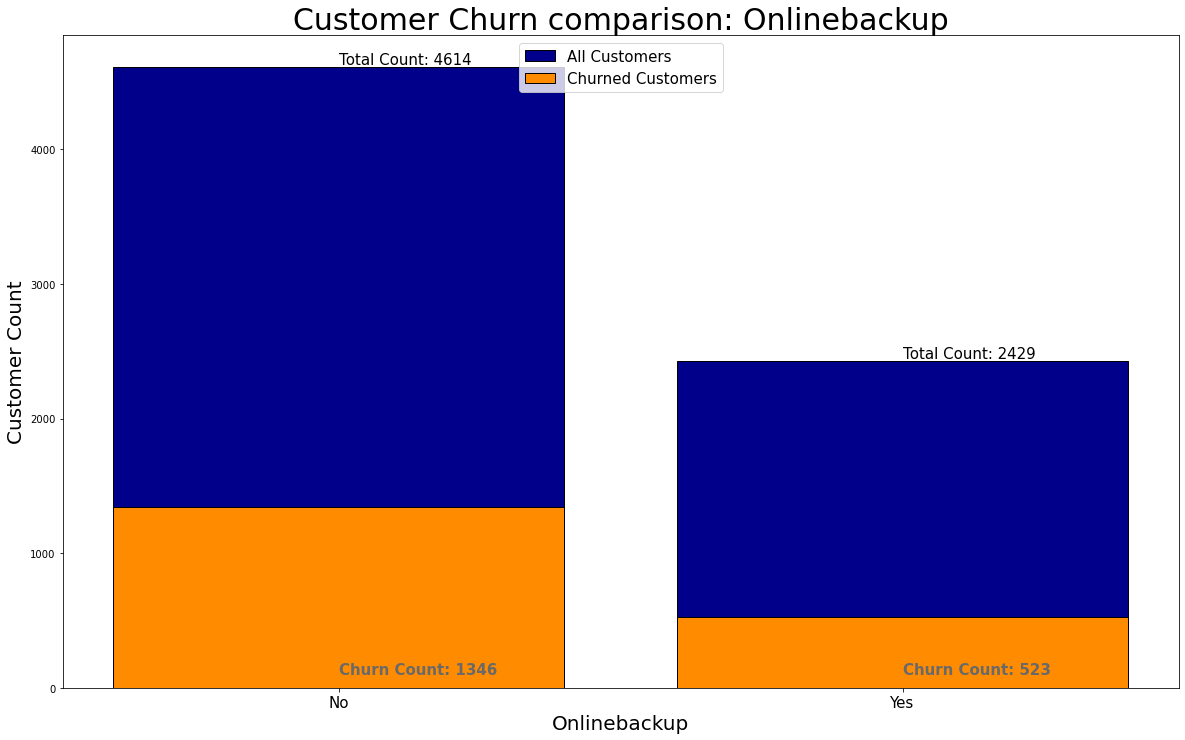

In [41]:
compare_churn('OnlineBackup')

In the case of **Online Backup** as well, customers without the service are churning more.

### Device Protection

,Total Customer Count,Customers Churned Count,% of Customers Churned
DeviceProtection,,,
No,4621,1324,28.65%
Yes,2422,545,22.5%


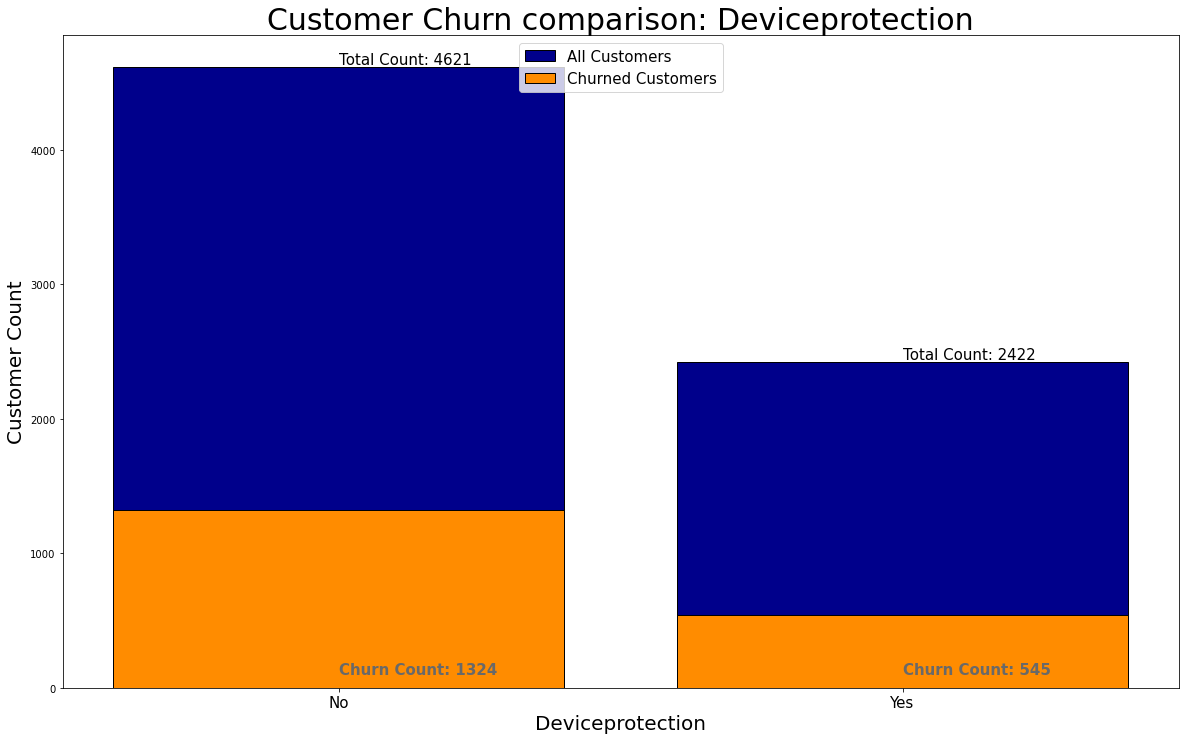

In [42]:
compare_churn('DeviceProtection')

**Device Protection** also seems to have an impact as customers without the service are churning more.

### Tech Support

,Total Customer Count,Customers Churned Count,% of Customers Churned
TechSupport,,,
No,4999,1559,31.19%
Yes,2044,310,15.17%


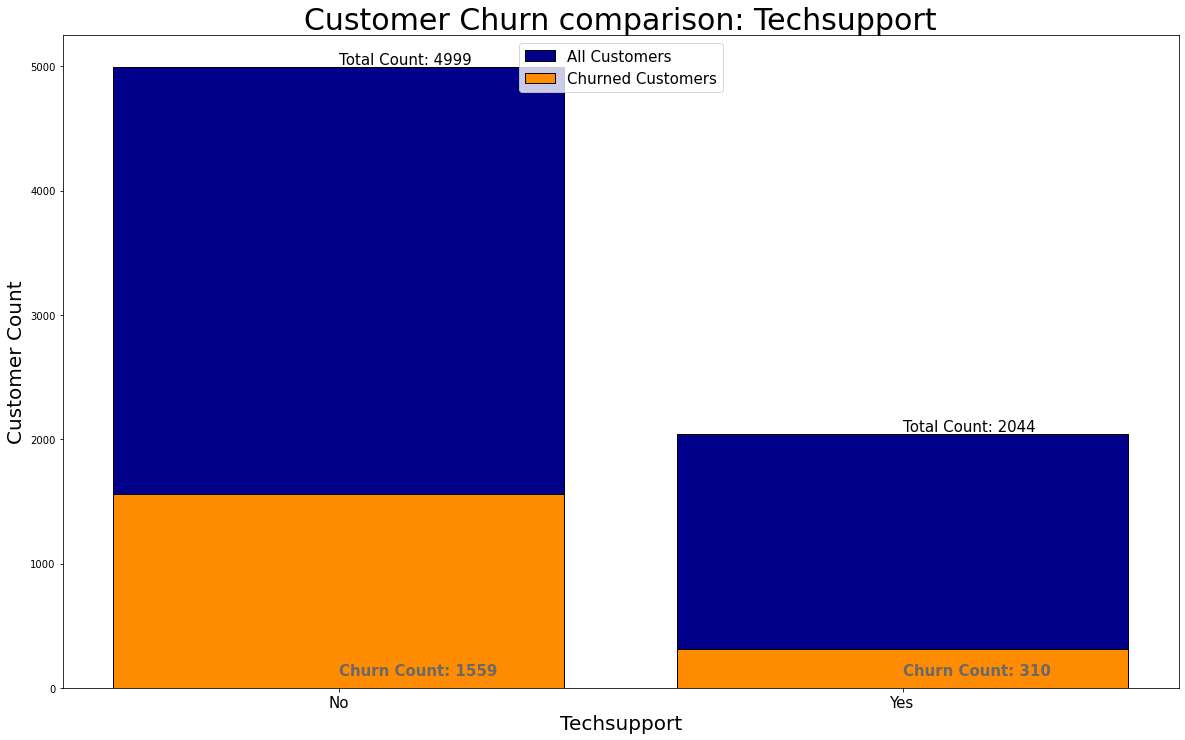

In [43]:
compare_churn('TechSupport')

Customers without **Tech Support** are churning more.

### Streaming TV

,Total Customer Count,Customers Churned Count,% of Customers Churned
StreamingTV,,,
No,4336,1055,24.33%
Yes,2707,814,30.07%


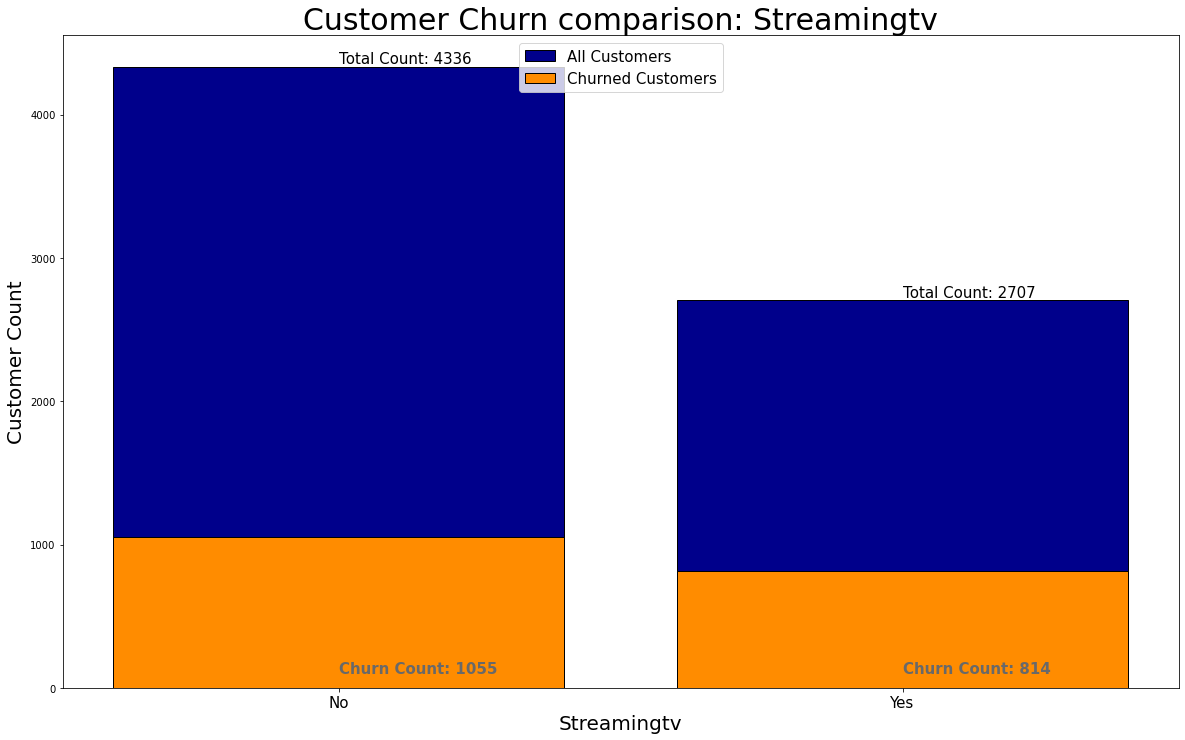

In [44]:
compare_churn('StreamingTV')

There is slightly more churn among customers who have **Streaming TV** subscription.

### Streaming Movies

,Total Customer Count,Customers Churned Count,% of Customers Churned
StreamingMovies,,,
No,4311,1051,24.38%
Yes,2732,818,29.94%


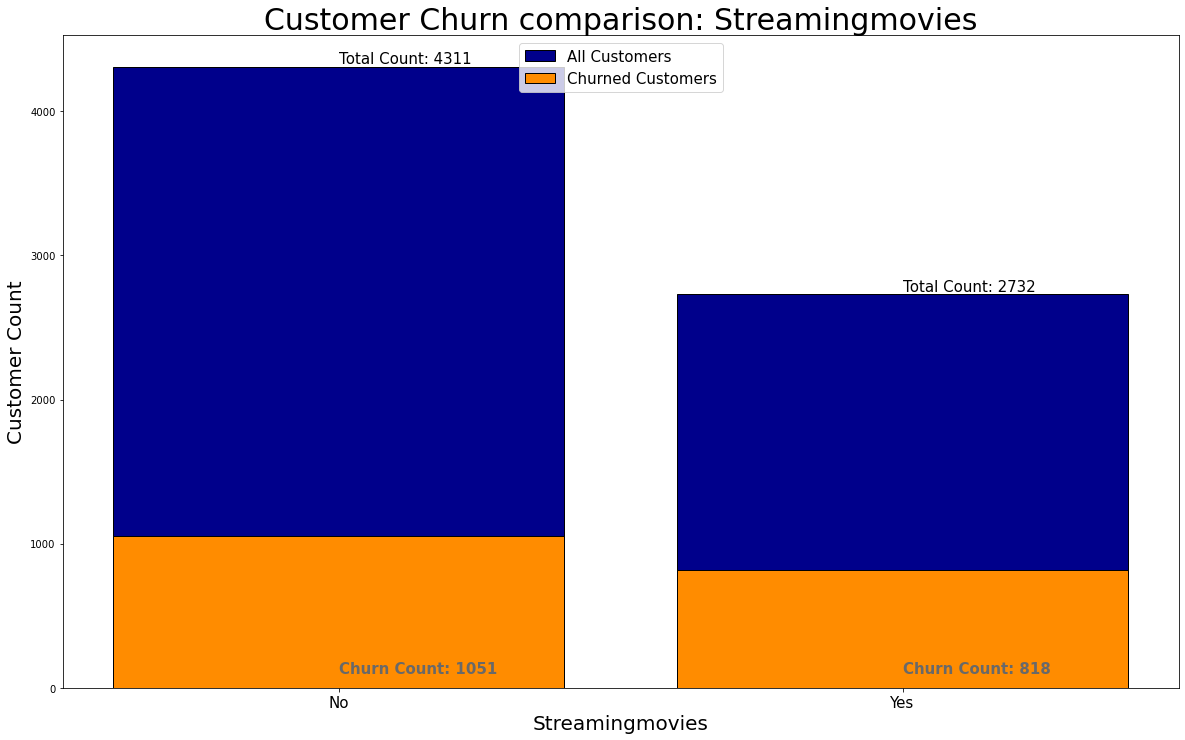

In [45]:
compare_churn('StreamingMovies')

The same goes for **Streaming Movies** as there is slightly more churn among customers who have **Streaming Movies** subscription.

### Loyalty

,Total Customer Count,Customers Churned Count,% of Customers Churned
loyalty,,,
0,3875,1655,42.71%
1,3168,214,6.76%


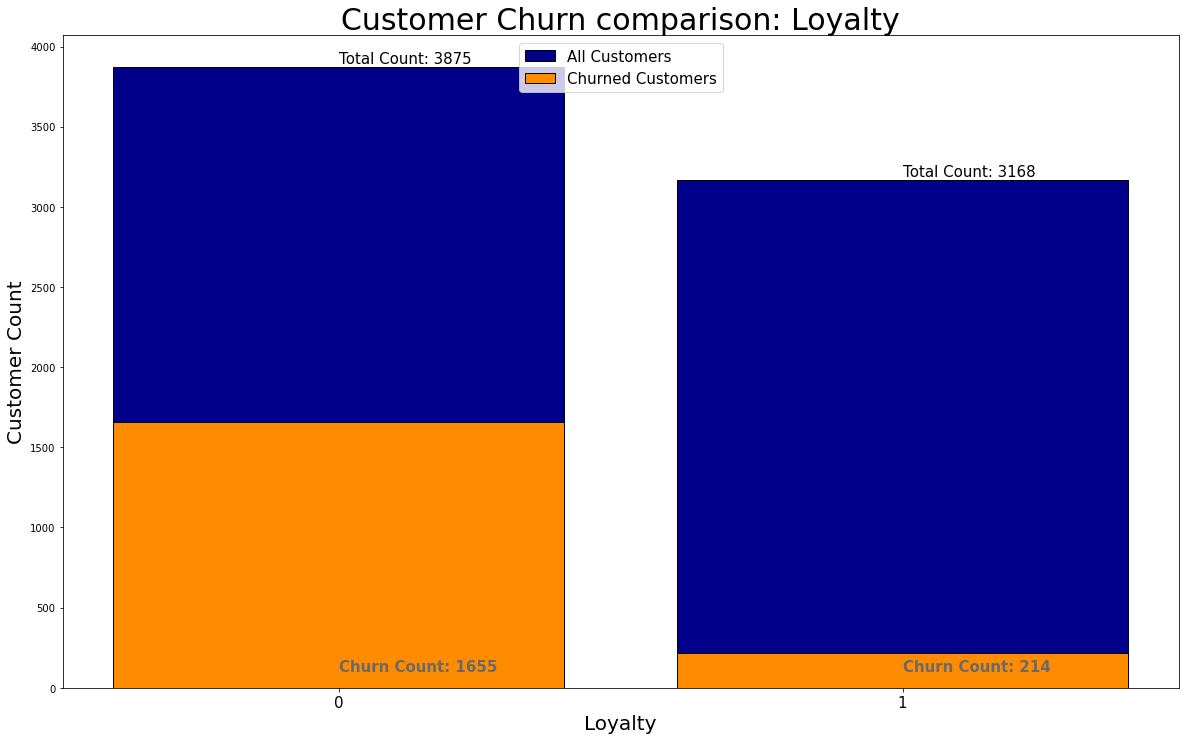

In [46]:
compare_churn('loyalty')

Customers with a month-to-month contract are churning at a significantly higher rate than those on a one-year or two-year contract.

### Paperless Billing

,Total Customer Count,Customers Churned Count,% of Customers Churned
PaperlessBilling,,,
No,2872,469,16.33%
Yes,4171,1400,33.57%


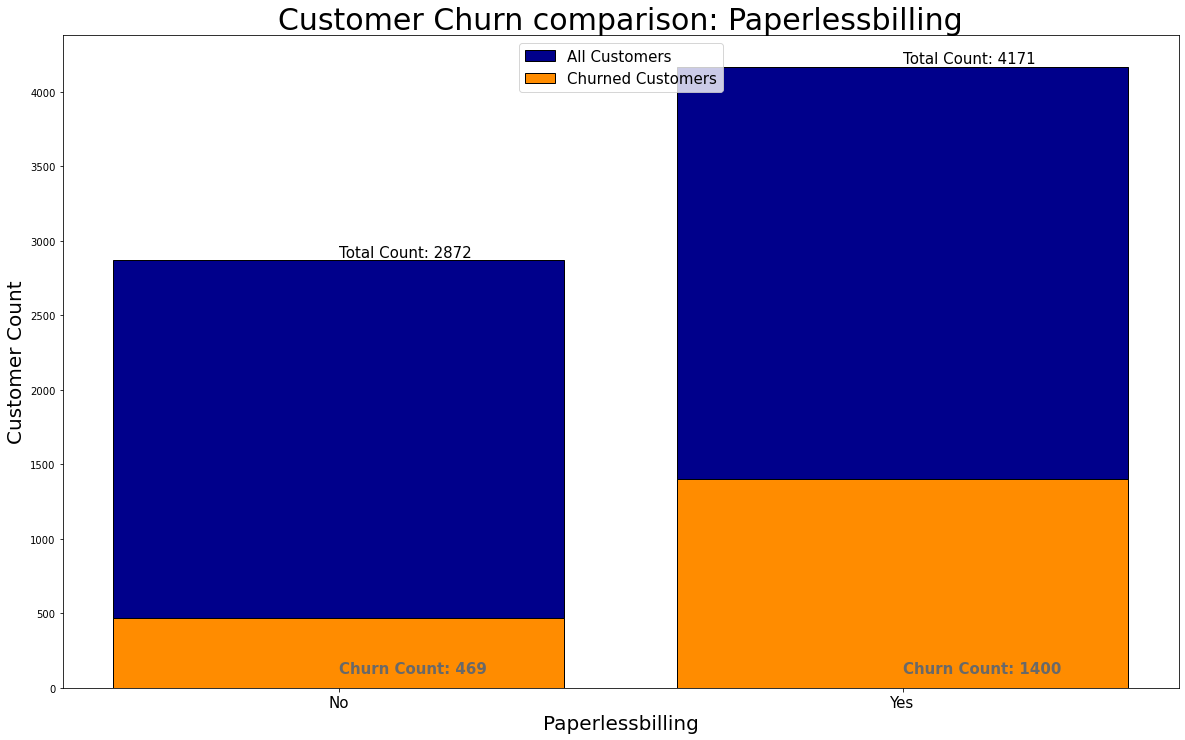

In [47]:
compare_churn('PaperlessBilling')

Customers adopting **Paperless Billing** are churning more.

### Payment Method

,Total Customer Count,Customers Churned Count,% of Customers Churned
PaymentMethod,,,
Bank transfer (automatic),1544,258,16.71%
Credit card (automatic),1522,232,15.24%
Electronic check,2365,1071,45.29%
Mailed check,1612,308,19.11%


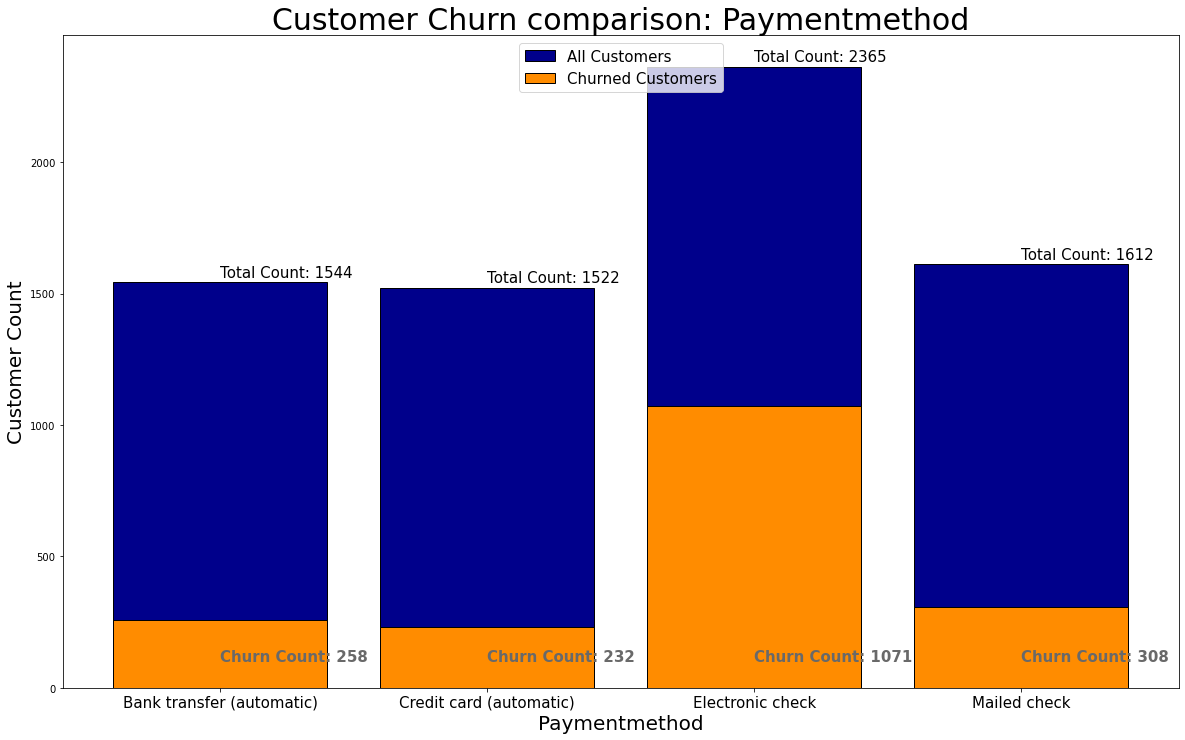

In [48]:
compare_churn('PaymentMethod')

Customers using an electronic check as a **Payment Method** have a higher rate at which customers are churning.

### Summary

Having looked at the information provided in our features, we can identify what kind of customer is more likely to churn. The following features are the ones that show a a greater proportion of customers churning:

* ***Monthly Charges***
* ***Partner***
* ***Dependents***
* ***Internet Service***
* ***Online Security***
* ***Online Backup***
* ***Device Protection***
* ***Tech Support***
* ***Loyalty***
* ***Paperless Billing***
* ***Payment Method***

## Identifying correlations in features

Now we let us check for multicollinearity in our features. If the correlation is greater than 0.8, we can conclude that there is a strong correlation. This can help us remove unnecessary features to improve generalization.

### Correlation between Continuous Variable Features

In [49]:
corr_check = df[['MonthlyCharges', 'TotalCharges', 'tenure']].copy()

In [50]:
corr_check.corr(method='pearson')

,MonthlyCharges,TotalCharges,tenure
MonthlyCharges,1.000000,0.651182,0.247900
TotalCharges,0.651182,1.000000,0.826164
tenure,0.247900,0.826164,1.000000


As seen from the table above, there is a correlation between **Monthly Charges** and **Total Charges**, and also a strong correlation between **Total Charges** and **Tenure**.

We can later remove **Total Charges** to help reduct multi-colinearity.

### Mutual Information

We can now convert our categorical values to numeric codes to check for mutual information.

In [51]:
X = df.drop(['customerID'],axis=1).copy()
y = X.pop('Churn')

for col in list(X.select_dtypes(['object', 'category']).columns):
    X[col], _ = X[col].factorize()

discrete_features = X.dtypes == int

In [52]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name='mutual_information оценка', index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3].to_frame('Mi_scores')

,Mi_scores
Contract,0.098453
MonthlyCharges,0.046726
InternetService,0.031370
TechSupport,0.014608
SeniorCitizen,0.010577
StreamingTV,0.001981
PhoneService,0.000072


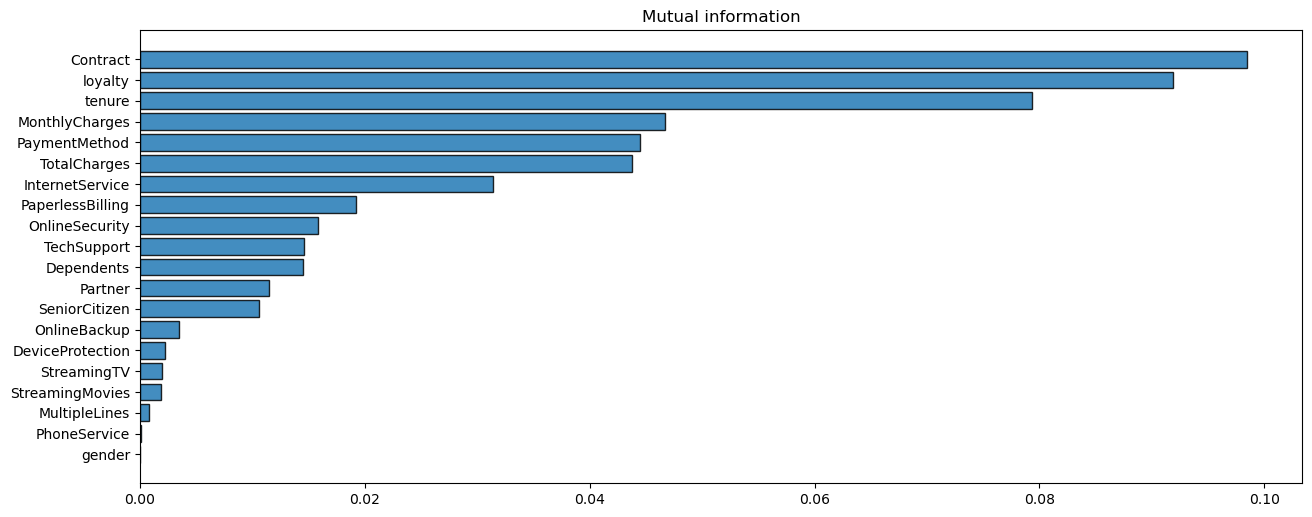

In [53]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores, ec='black', alpha=0.84)
    plt.yticks(width, ticks)
    plt.title('Mutual information')


plt.figure(dpi=100, figsize=(15, 6))
plot_mi_scores(mi_scores)